# Predicting the number of retweets

Objective:

Your task is to write a small R/python script to explore the given dataset and predict the total number of retweets a tweet will get using only the provided dataset. This task is designed to test your ability to understand and evaluate business use cases from given data source along with the scripting skills and your knowledge of Data Science techniques and your ability to work effectively, efficiently and independently within a commercial setting. This task is not designed to test your hyper tuning abilities or lateral thinking; the fewer lines of code the better. Think of this as iteration one or a proof of concept. 

Deliverables:

•         One R/python script <br>
•         One requirements text file including an exhaustive list of packages and version numbers used in your solution<br>
•         Nothing else<br>

Your solution should at a minimum do the following:

•         Load the data into memory<br>
•         Prepare the data for modeling<br>
•         Build an analytical model on given data<br>
•         Build an interactive dashboard to visualize the key findings<br>
•         Provide some measure of performance/accuracy of analysis<br>

### Loading data

In [34]:
# Refresh all variables from store
%store -r

In [1]:
import pandas as pd

In [9]:
filePath = "./Bharti axa test/Data Analytics-Assesment tweets.xlsx"

In [194]:
data = pd.read_excel(filePath,header=0)
%store data

Stored 'data' (DataFrame)


### Data Preprocessing

In [22]:
data.shape

(42368, 32)

In [18]:
data.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [21]:
# counting the number of NaN values along columns
data.isnull().sum()

TweetPostedTime                  0
TweetID                          0
TweetBody                        0
TweetRetweetFlag                 0
TweetSource                      0
TweetInReplyToStatusID       42267
TweetInReplyToUserID         42179
TweetInReplyToScreenName     42179
TweetRetweetCount                0
TweetFavoritesCount              0
TweetHashtags                  100
TweetPlaceID                 41368
TweetPlaceName               41368
TweetPlaceFullName           41368
TweetCountry                 41369
TweetPlaceBoundingBox        41368
TweetPlaceAttributes         42368
TweetPlaceContainedWithin    42368
UserID                           0
UserName                         0
UserScreenName                   0
UserLocation                 16026
UserDescription               4364
UserLink                     25769
UserExpandedLink             25806
UserFollowersCount               0
UserFriendsCount                 0
UserListedCount                  0
UserSignupDate      

In [195]:
# lets drop columns with more than 20% null values
data = data.drop([
                    'TweetInReplyToStatusID',
                    'TweetInReplyToUserID',
                    'TweetInReplyToScreenName',
                    'TweetPlaceID',
                    'TweetPlaceName',
                    'TweetPlaceFullName',
                    'TweetCountry',
                    'TweetPlaceBoundingBox',
                    'TweetPlaceAttributes',
                    'TweetPlaceContainedWithin',
                    'UserLocation',
                    'UserLink',
                    'UserExpandedLink',
                    'tweet.place',
                    'UserDescription'
                 ],axis=1)

In [40]:
# dropping 100 tweets with null hashtags
data = data.dropna(axis=0)

In [41]:
data.shape

(42268, 17)

In [50]:
data['UserSignupDate'] =  pd.to_datetime(data['UserSignupDate'], format='%a %b %d %H:%M:%S +0000 %Y')
data['TweetPostedTime'] =  pd.to_datetime(data['TweetPostedTime'], format='%a %b %d %H:%M:%S +0000 %Y')

In [63]:
data['DaysSpentOnTwitter'] = (data['TweetPostedTime'] - data['UserSignupDate'])

In [64]:
data['DaysSpentOnTwitter'].dtype

dtype('<m8[ns]')

In [65]:
import datetime as dt
data['DaysSpentOnTwitter'] = data['DaysSpentOnTwitter'].dt.days

In [66]:
data['DaysSpentOnTwitter'].dtype

dtype('int64')

### Feature Creation

I am creating a new feature named ActivityIndex which is 'UserTweetCount / DaysSpentOnTwitter' or number of tweets per day and we will see its impact on number of retweets later. I believe it should have some amount of positive correlation. #FingersCrossed

In [67]:
data['ActivityIndex'] = data['UserTweetCount'] / data['DaysSpentOnTwitter']

In [71]:
# Dropping columns that i believe will not help in determining retweets
data = data.drop([
                    'TweetPostedTime',
                    'TweetID',
                    'TweetSource',
                    'TweetFavoritesCount',
                    'UserID',
                    'UserName',
                    'UserScreenName',
                    'UserSignupDate',
                    'MacroIterationNumber'
                 ],axis=1)

In [74]:
# Moving retweets count to the rightmost column as it is a dependent variable
data['RetweetsCount'] = data['TweetRetweetCount']
data = data.drop(['TweetRetweetCount'],axis=1)

In [75]:
data

,TweetBody,TweetRetweetFlag,TweetHashtags,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,DaysSpentOnTwitter,ActivityIndex,RetweetsCount
0,RT @BeachyMaldives: Local interaction is a gre...,True,"Maldives, vacation, travel",6334,6144,1917,33556,554,60.570397,1
1,RT @TechTerraEd: Need #giftideas for your kid(...,True,"giftideas, holiday",154,371,180,3201,2543,1.258750,1
2,Seven Questions Before Choosing a Cruise Line ...,False,"travel, TTOT",23433,24762,961,147958,2764,53.530391,0
3,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"yoga, bresil, meditation, holiday",11136,10081,978,28988,464,62.474138,1
4,"RT @StylishRentals: Love this! ""Palm Springs M...",True,Travel,55,21,31,19581,103,190.106796,3065
5,"RT @StylishRentals: Love this! ""Palm Springs M...",True,Travel,58,21,23,17112,103,166.135922,3065
6,RT @Atulmaharaj: #myanmar up close by none oth...,True,"myanmar, Travel, blog",1950,471,204,8520,2008,4.243028,1
7,"RT @StylishRentals: ""The Guest Room &amp; The ...",True,Travel,143,33,45,22918,124,184.822581,2970
8,RT @hocais: #Rize #Turkey\n#Ayder\n#CityOfAllS...,True,"Rize, Turkey, Ayder, CityOfAllSeasons, HerMevs...",811,77,27,10579,1804,5.864191,11
9,"Images from #Paris. An apartment, dinner, musi...",False,"Paris, travel",1380,1333,260,41506,1174,35.354344,0


### Plotting correlation matrix to determine which columns determines the retweet counts the most

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
numericData = data.iloc[:,3:]

In [94]:
sns.set(style="white")

# Compute the correlation matrix
corr = numericData.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [95]:
corr

,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,DaysSpentOnTwitter,ActivityIndex,RetweetsCount
UserFollowersCount,1.000000,0.714110,0.492912,0.154146,0.122275,0.012877,-0.080255
UserFriendsCount,0.714110,1.000000,0.503422,0.352637,0.166833,0.070499,-0.143398
UserListedCount,0.492912,0.503422,1.000000,0.532900,0.269859,0.134322,-0.244162
UserTweetCount,0.154146,0.352637,0.532900,1.000000,0.205581,0.431709,-0.108805
DaysSpentOnTwitter,0.122275,0.166833,0.269859,0.205581,1.000000,-0.418559,-0.572546
ActivityIndex,0.012877,0.070499,0.134322,0.431709,-0.418559,1.000000,0.518729
RetweetsCount,-0.080255,-0.143398,-0.244162,-0.108805,-0.572546,0.518729,1.000000


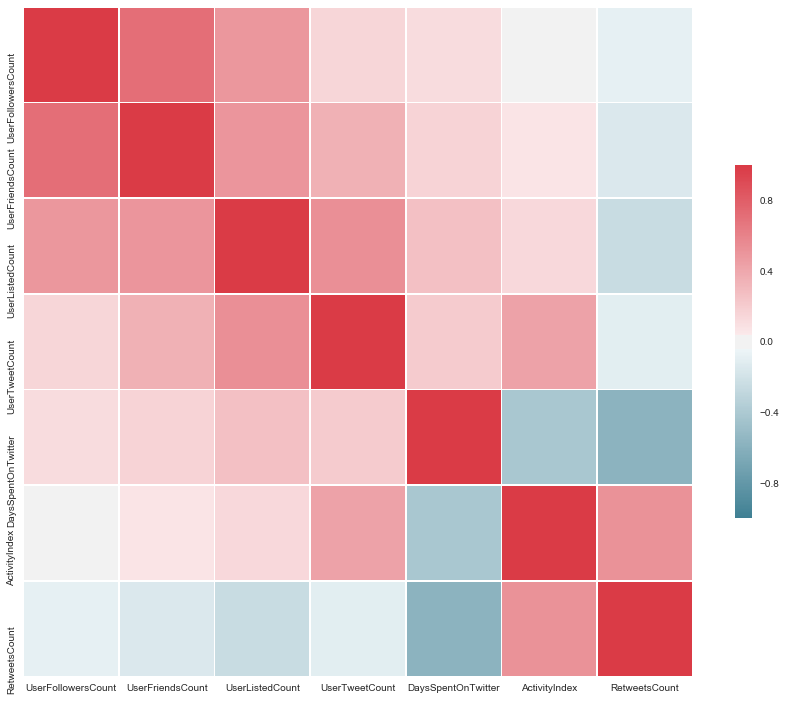

In [96]:
plt.show()

We see that the ActivityIndex created in my experiment has outperformed prexisting features however DaysSpentOnTwitter is showing a higher negative correlation which signifies the more days you spend on twitter the lesser retweets you get but this is not true, rather if you spend more days without activity ie number of tweets per day on twitter your retweets will decrease. Its the same thing as a person who is rally active on facebook is more likely to get more likes. One thing i feel at this moment is number of followers and friends should also have an imapct on number of retweets but by looking at this data i notice that there is actually no correlation which is correctly suggested by heap map too.

### Lets use columns 4 to 9 to predict retweets

Train test split

In [116]:
from sklearn.model_selection import train_test_split

In [130]:
X = data.iloc[:,3:9].values
Y = data.iloc[:,9].values

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3 )

Training Regressor

In [111]:
from xgboost.sklearn import XGBRegressor

In [112]:
XGB_param_grid = {
                    'max_depth':[3,4,5,6,7,8,9,10],
                    'min_child_weight':[1,3,5,7,9],
                    'learning_rate':[0.001,0.01,0.05,0.1,0.15,0.21,0.25],
                    'n_estimators':[10,30,60,100,200,300,500,700,1000],
                    'gamma':[i/10.0 for i in range(0,5)],
                    'subsample':[i/100.0 for i in range(75,90,5)],
                    'colsample_bytree':[i/100.0 for i in range(75,90,5)],
                    'reg_alpha':[1e-5, 1e-2, 0, 0.001, 0.005, 0.05, 0.1, 1, 100 ]                   
                 }

In [113]:
from sklearn.grid_search import RandomizedSearchCV

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [135]:
xgb = XGBRegressor()
randcvXGB = RandomizedSearchCV(xgb, XGB_param_grid, cv=5, n_iter=10,verbose=2)

In [136]:
# takes approx 7 minutes 
%%time 
randcvXGB.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 
[CV]  subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 -  11.7s
[CV] subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV]  subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 -  12.2s
[CV] subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 
[CV]  subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 -  10.2s
[CV] subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 
[CV]  subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 -  11.8s
[CV] subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 
[CV]  subsample=0.85, reg_alpha=1, n_estimators=500, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.75 

[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.85 -   1.1s
[CV] subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.85 
[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.85 -   1.0s
[CV] subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.85 
[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.85 -   1.5s
[CV] subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.85 
[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=30, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.4, colsampl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


Wall time: 6min 37s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 3, 5, 7, 9], 'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.21, 0.25], 'n_estimators': [10, 30, 60, 100, 200, 300, 500, 700, 1000], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85], 'reg_alpha': [1e-05, 0.01, 0, 0.001, 0.005, 0.05, 0.1, 1, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, ver

In [141]:
bestParams = randcvXGB.best_params_
%store bestParams

In [137]:
print(randcvXGB.best_score_)
print(randcvXGB.best_params_)

0.988076607111043
{'subsample': 0.85, 'reg_alpha': 0, 'n_estimators': 30, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.21, 'gamma': 0.3, 'colsample_bytree': 0.85}


In [138]:
# Using rootmean square error as our model evaluation metric
from sklearn.metrics import r2_score

In [145]:
print("RMS score :" , r2_score(Y_test, randcvXGB.best_estimator_.predict(X_test)) )

RMS score : 0.9879875007788738


### Lets use only ActivityIndex column to predict retweets

In [184]:
X_AI = X_train[:,5]

In [185]:
X_AI = [[i] for i in X_AI]

In [186]:
%%time 
randcvXGB.fit(X_AI, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 -   1.4s
[CV] subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 -   1.3s
[CV] subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 -   1.4s
[CV] subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 -   1.5s
[CV] subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.75, reg_alpha=0.1, n_estimators=100, min_child_weight=9, max_depth=10, learning_rate=0.25, gamma=0.1, colsamp

[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.85 -   5.5s
[CV] subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.85 
[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.85 -   5.6s
[CV] subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.85 
[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.85 -   5.5s
[CV] subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.85 
[CV]  subsample=0.85, reg_alpha=0.1, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytre

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.5min finished


Wall time: 4min 39s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 3, 5, 7, 9], 'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.21, 0.25], 'n_estimators': [10, 30, 60, 100, 200, 300, 500, 700, 1000], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85], 'reg_alpha': [1e-05, 0.01, 0, 0.001, 0.005, 0.05, 0.1, 1, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, ver

In [187]:
bestParams_AI = randcvXGB.best_params_
%store bestParams_AI

Stored 'bestParams_AI' (dict)


In [188]:
print(randcvXGB.best_score_)
print(randcvXGB.best_params_)

0.8010530250489223
{'subsample': 0.75, 'reg_alpha': 0.001, 'n_estimators': 700, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.8}


In [189]:
# Using rootmean square error as our model evaluation metric
from sklearn.metrics import r2_score

In [191]:
X_AI_test = X_test[:,5]
X_AI_test = [[i] for i in X_AI_test]

In [192]:
print("RMS score :" , r2_score(Y_test, randcvXGB.best_estimator_.predict(X_AI_test)) )

RMS score : 0.8185552291197272


### Conclusion: 
We see significant improvement in our model on removing unwanted features and keeping Activity index as our only determining factor for predicting retweets as our RMS error decreased from 0.987 to 0.818 on the test set.

### Further Improvements:
1. We can capture retweet_name from tweet body "RT @(retweet_name)" wherever TweetRetweetFlag is true and use a labelencoder to mark it as an integer and use it as another feature in our model.

2. We can use NLP to extract keywords from tweet body and combine it with hashtags and create a scoring/popularity function which we need to train on the retweetCount column. eg. lets say a tweet has keywords ['StylishRentals','Travel'] which after label encoding becomes say [2,3] then retweetCount 3000 will be given as dependent variable to a regressor which will try to fit those encoded keywords to retweet count. This approach is just a hypothesis.  

Workbook by Tathagat A. Jha